## Modellierung (2)

Multiple lineare Regression nach ÖV-Güteklasse (ÖV-Güteklasse & sozioökonomische-Faktoren)
1) ohne sozioökonomische Faktoren
2) dann Erweiterung

unabhängige Variable (X-Parameter) :
- Numerisch: Alter
- Kategorisch: Haushaltseinkommen, Geschlecht, Alter, ÖV-Güteklasse

abhängige Variable (Y-Parameter) : 
- CO₂-Emissionen

## 0. Vorbereitung: Import der benötigten Python-Libraries 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
gdf = gpd.read_file('Daten/wege.gpkg')
print(gdf.head())

     HHNR  HH_BFS_NR  HH_PLZ    HH_ORT  HH_KANTON  HH_OEV_GUETEKLASSE  \
0  110001       5624    1030  Bussigny         22                   3   
1  110001       5624    1030  Bussigny         22                   3   
2  110001       5624    1030  Bussigny         22                   3   
3  110001       5624    1030  Bussigny         22                   3   
4  110001       5624    1030  Bussigny         22                   3   

   HH_STADT_LAND  HH_HAUSHALTSGROESSE  HH_HAUSHALTSEINKOMMEN  ZP_ALTER  ...  \
0  Städtisch (1)                    2                      5        57  ...   
1  Städtisch (1)                    2                      5        57  ...   
2  Städtisch (1)                    2                      5        57  ...   
3  Städtisch (1)                    2                      5        57  ...   
4  Städtisch (1)                    2                      5        57  ...   

   FAHRZEUG_ENERGIEEFFIZIENZKLASSE  FAHRZEUG_VERBRAUCH  EL_Verbrauch  \
0             

In [3]:
gdf.head()

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,...,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,HH_RAUMTYPOLOGIE_9,CO2E_KG_KM_AUTO,CO2E_KG_KM_OTHER,CO2E_TOTAL,geometry
0,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,0.414223,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,83.010354,"LINESTRING Z (2532653.357 1155702.624 420.558,..."
1,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,0.307909,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,61.705018,"LINESTRING Z (2532933.573 1155665.561 430.418,..."
2,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,0.586282,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,117.490869,"LINESTRING Z (2533071.108 1155894.339 430.657,..."
3,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,1.599024,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,320.444438,MULTILINESTRING Z ((2532653.357 1155702.624 41...
4,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,2.445678,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,490.113940,"LINESTRING Z (2532957.334 1156871.023 475.614,..."


In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 552622 entries, 0 to 552621
Data columns (total 41 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   HHNR                                   552622 non-null  int64   
 1   HH_BFS_NR                              552622 non-null  int64   
 2   HH_PLZ                                 552622 non-null  int64   
 3   HH_ORT                                 552622 non-null  object  
 4   HH_KANTON                              552622 non-null  int64   
 5   HH_OEV_GUETEKLASSE                     552622 non-null  int64   
 6   HH_STADT_LAND                          552622 non-null  object  
 7   HH_HAUSHALTSGROESSE                    552622 non-null  int64   
 8   HH_HAUSHALTSEINKOMMEN                  552622 non-null  int64   
 9   ZP_ALTER                               552622 non-null  int64   
 10  ZP_GESL                             

                       ZP_ALTER   ZP_GESL  HH_HAUSHALTSEINKOMMEN  CO2E_TOTAL  \
ZP_ALTER               1.000000 -0.002659               0.360617    0.035641   
ZP_GESL               -0.002659  1.000000              -0.058462   -0.035561   
HH_HAUSHALTSEINKOMMEN  0.360617 -0.058462               1.000000    0.033423   
CO2E_TOTAL             0.035641 -0.035561               0.033423    1.000000   
HH_OEV_GUETEKLASSE     0.009082 -0.015998              -0.017035    0.113177   

                       HH_OEV_GUETEKLASSE  
ZP_ALTER                         0.009082  
ZP_GESL                         -0.015998  
HH_HAUSHALTSEINKOMMEN           -0.017035  
CO2E_TOTAL                       0.113177  
HH_OEV_GUETEKLASSE               1.000000  


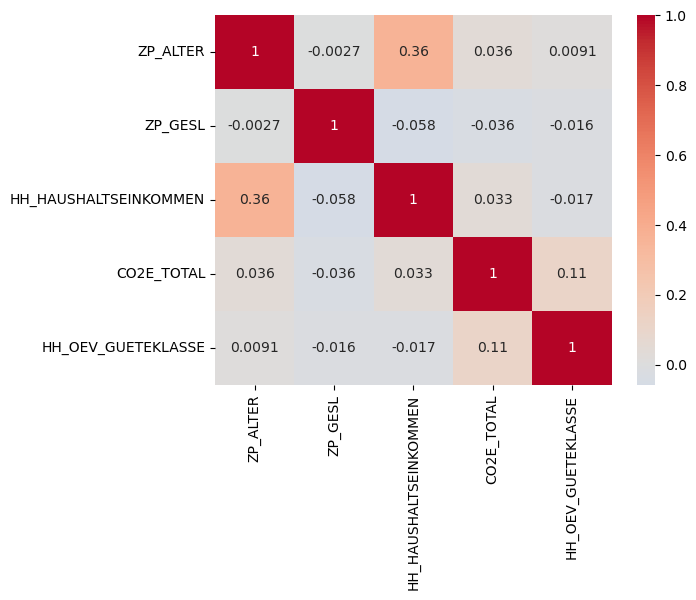

In [5]:
# Korrelation überprüfen
correlation_matrix = gdf[['ZP_ALTER', 'ZP_GESL', 'HH_HAUSHALTSEINKOMMEN', 'CO2E_TOTAL', 'HH_OEV_GUETEKLASSE']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


## 2. Vorverarbeitung der Daten

In [38]:
# Nur relevante Variablen beibehalten
gdf_bereinigt = gdf[['CO2E_TOTAL', 'ZP_ALTER', 'ZP_GESL', 'HH_HAUSHALTSEINKOMMEN', 'HH_OEV_GUETEKLASSE', 'geometry']]

# Datensatz bereinigen: Nur Zeilen mit nicht-leeren Werten in den relevanten Spalten
gdf_bereinigt = gdf_bereinigt.dropna()

In [7]:
print(type(gdf_bereinigt))

<class 'geopandas.geodataframe.GeoDataFrame'>


### Dummy Variablen erstellen

In [39]:
# Die Werte in ZP_GESL bedeuten: 1 = Mann und 2 = Frau
# Männer werden weggelassen, da sie als Referenzkategorie dienen, somit wird nur die Variable ZP_GESL_2 benötigt (Frauen)

gdf_bereinigt = pd.get_dummies(gdf_bereinigt, columns=['ZP_GESL'], drop_first=True)

# In Integer umwandeln
gdf_bereinigt['ZP_GESL_2'] = gdf_bereinigt['ZP_GESL_2'].astype(int)

gdf_bereinigt.head()

,CO2E_TOTAL,ZP_ALTER,HH_HAUSHALTSEINKOMMEN,HH_OEV_GUETEKLASSE,geometry,ZP_GESL_2
0,83.010354,57,5,3,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0
1,61.705018,57,5,3,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0
2,117.490869,57,5,3,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0
3,320.444438,57,5,3,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0
4,490.113940,57,5,3,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0


In [40]:
# Güteklasse 1 wird weg gelassen, da sie die Referenzklasse ist
gdf_bereinigt = pd.get_dummies(gdf_bereinigt, columns=['HH_OEV_GUETEKLASSE'], drop_first=True)
gdf_bereinigt.head()

,CO2E_TOTAL,ZP_ALTER,HH_HAUSHALTSEINKOMMEN,geometry,ZP_GESL_2,HH_OEV_GUETEKLASSE_2,HH_OEV_GUETEKLASSE_3,HH_OEV_GUETEKLASSE_4,HH_OEV_GUETEKLASSE_5
0,83.010354,57,5,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0,False,True,False,False
1,61.705018,57,5,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0,False,True,False,False
2,117.490869,57,5,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0,False,True,False,False
3,320.444438,57,5,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0,False,True,False,False
4,490.113940,57,5,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0,False,True,False,False


In [41]:
# Dummy-Variablen in numerische Werte umwandeln
gdf_bereinigt['HH_OEV_GUETEKLASSE_2'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_2'].astype(int)
gdf_bereinigt['HH_OEV_GUETEKLASSE_3'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_3'].astype(int)
gdf_bereinigt['HH_OEV_GUETEKLASSE_4'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_4'].astype(int)
gdf_bereinigt['HH_OEV_GUETEKLASSE_5'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_5'].astype(int)

In [17]:
gdf_bereinigt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 473372 entries, 0 to 552621
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CO2E_TOTAL             473372 non-null  float64 
 1   ZP_ALTER               473372 non-null  int64   
 2   HH_HAUSHALTSEINKOMMEN  473372 non-null  int64   
 3   geometry               473372 non-null  geometry
 4   ZP_GESL_2              473372 non-null  int32   
 5   HH_OEV_GUETEKLASSE_2   473372 non-null  int32   
 6   HH_OEV_GUETEKLASSE_3   473372 non-null  int32   
 7   HH_OEV_GUETEKLASSE_4   473372 non-null  int32   
 8   HH_OEV_GUETEKLASSE_5   473372 non-null  int32   
dtypes: float64(1), geometry(1), int32(5), int64(2)
memory usage: 27.1 MB


In [ ]:
# Bedeutung der Kategorien:
# - -99	Nicht gestellt, da Zielperson jünger als 18 ist
# - -98	keine Antwort
# - -97	weiss nic
# Es macht keinen Sinn, dass eine dieser Kategorien die Referenzkategorie ist. Deshalb werden die Daten gelöscht. 
gdf_bereinigt = gdf_bereinigt[~gdf_bereinigt['HH_HAUSHALTSEINKOMMEN'].isin([-99, -98, -97])]

# Dummy-Variablen erstellen und die Referenzkategorie auf HH_HAUSHALTSEINKOMMEN_1 setzen
gdf_bereinigt = pd.get_dummies(gdf_bereinigt, columns=['HH_HAUSHALTSEINKOMMEN'], drop_first=True)

gdf_bereinigt.head()



,CO2E_TOTAL,ZP_ALTER,geometry,ZP_GESL_2,HH_OEV_GUETEKLASSE_2,HH_OEV_GUETEKLASSE_3,HH_OEV_GUETEKLASSE_4,HH_OEV_GUETEKLASSE_5,HH_HAUSHALTSEINKOMMEN_2,HH_HAUSHALTSEINKOMMEN_3,HH_HAUSHALTSEINKOMMEN_4,HH_HAUSHALTSEINKOMMEN_5,HH_HAUSHALTSEINKOMMEN_6,HH_HAUSHALTSEINKOMMEN_7,HH_HAUSHALTSEINKOMMEN_8,HH_HAUSHALTSEINKOMMEN_9
0,83.010354,57,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0,0,1,0,0,False,False,False,True,False,False,False,False
1,61.705018,57,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0,0,1,0,0,False,False,False,True,False,False,False,False
2,117.490869,57,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0,0,1,0,0,False,False,False,True,False,False,False,False
3,320.444438,57,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0,0,1,0,0,False,False,False,True,False,False,False,False
4,490.113940,57,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0,0,1,0,0,False,False,False,True,False,False,False,False


In [44]:
# Umwandlung der Haushaltseinkommen in kategorische Variablen
einkommen_kategorien = ['HH_HAUSHALTSEINKOMMEN_2', 'HH_HAUSHALTSEINKOMMEN_3', 'HH_HAUSHALTSEINKOMMEN_4',
    'HH_HAUSHALTSEINKOMMEN_5', 'HH_HAUSHALTSEINKOMMEN_6', 'HH_HAUSHALTSEINKOMMEN_7',
    'HH_HAUSHALTSEINKOMMEN_8', 'HH_HAUSHALTSEINKOMMEN_9'
]

for kategorie in einkommen_kategorien:
    gdf_bereinigt[kategorie] = gdf_bereinigt[kategorie].astype(int)

gdf_bereinigt.head()

,CO2E_TOTAL,ZP_ALTER,geometry,ZP_GESL_2,HH_OEV_GUETEKLASSE_2,HH_OEV_GUETEKLASSE_3,HH_OEV_GUETEKLASSE_4,HH_OEV_GUETEKLASSE_5,HH_HAUSHALTSEINKOMMEN_2,HH_HAUSHALTSEINKOMMEN_3,HH_HAUSHALTSEINKOMMEN_4,HH_HAUSHALTSEINKOMMEN_5,HH_HAUSHALTSEINKOMMEN_6,HH_HAUSHALTSEINKOMMEN_7,HH_HAUSHALTSEINKOMMEN_8,HH_HAUSHALTSEINKOMMEN_9
0,83.010354,57,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0,0,1,0,0,0,0,0,1,0,0,0,0
1,61.705018,57,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0,0,1,0,0,0,0,0,1,0,0,0,0
2,117.490869,57,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0,0,1,0,0,0,0,0,1,0,0,0,0
3,320.444438,57,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0,0,1,0,0,0,0,0,1,0,0,0,0
4,490.113940,57,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0,0,1,0,0,0,0,0,1,0,0,0,0


## 3. Modell Trainieren und Analysieren

In [45]:
## Aufteilen in Trainings- und Testdaten (80% Training, 20% Test)
from sklearn.model_selection import train_test_split

train, test = train_test_split(gdf_bereinigt, test_size=0.2, random_state=42)

In [46]:
# Ergebnisse anzeigen
print(f"Trainingsdaten: {train.shape}")
print(f"Testdaten: {test.shape}")

Trainingsdaten: (286147, 16)
Testdaten: (71537, 16)


### Lineare Regression (Geschlecht, Alter)

In [47]:
X = train[['ZP_ALTER', 'ZP_GESL_2']]
X = sm.add_constant(X)
y = train['CO2E_TOTAL']

In [48]:
# OLS Modell fitten
model = sm.OLS(y, X).fit()

# Modell summary ausgeben
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           4.70e-86
Time:                        10:18:42   Log-Likelihood:            -2.1372e+06
No. Observations:              286147   AIC:                         4.274e+06
Df Residuals:                  286144   BIC:                         4.274e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        421.3853      2.659    158.448      0.0

Interpretation:
- Wenn alle Prädiktoren (Alter und Geschlecht) gleich 0 sind, beträgt der durchschnittliche CO₂-Ausstoss etwa 397,34. Das ist der Basiswert des Modells.
- Pro Jahr zusätzlichem Alter steigt der CO₂-Ausstoss im Durchschnitt um 0,79 kg.
- Frauen haben im Vergleich zu Männern durchschnittlich 29,94 kg weniger CO₂-Ausstoss.

### Lineare Regression (Geschlecht, Alter, ÖV-Güteklasse)

In [49]:
X2 = train[['ZP_ALTER', 'ZP_GESL_2', 'HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]
X2 = sm.add_constant(X2)
y2 = train['CO2E_TOTAL']

In [26]:
np.asarray(X2)

array([[ 1., 63.,  1., ...,  0.,  0.,  1.],
       [ 1., 15.,  0., ...,  0.,  1.,  0.],
       [ 1., 75.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 72.,  1., ...,  1.,  0.,  0.],
       [ 1., 57.,  0., ...,  0.,  0.,  1.],
       [ 1., 81.,  1., ...,  1.,  0.,  0.]])

In [27]:
np.asarray(y2)

array([ 378.27124729, 1209.10032568,   21.46619188, ..., 1300.52728829,
         66.28133212,  429.2442394 ])

In [50]:
# Modell fitten
model2 = sm.OLS(y2, X2).fit()

# Zusammenfassung des Modells anzeigen
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     711.4
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:18:55   Log-Likelihood:            -2.1353e+06
No. Observations:              286147   AIC:                         4.271e+06
Df Residuals:                  286140   BIC:                         4.271e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  322.8867 

### Bedeutung der Güteklassen:

- -97	Keine Angabe / Fehlende Geodaten
- 1	Klasse A: Sehr gute Erschliessung
- 2	Klasse B: Gute Erschliessung
- 3	Klasse C: Mittelmässige Erschliessung
- 4	Klasse D: Geringe Erschliessung
- 5	Keine Güteklasse: Marginale oder keine ÖV-Erschliessung

### Interpretation:

Die Koeffizienten geben an, wie sich der CO₂-Ausstoss ändert, wenn Haushalte in unterschiedlichen ÖV-Gütekategorien leben, im Vergleich zur Referenzkategorie (Klasse A: Sehr gute Erschliessung):

- Klasse B (Gute Erschliessung): + 65.77 kg
Haushalte mit guter ÖV-Erschliessung emittieren im Durchschnitt 65,77 kg mehr CO₂ als Haushalte mit sehr guter ÖV-Erschliessung.

- Klasse C (Mittelmässige Erschliessung): +97.64 kg
Der CO₂-Ausstoß steigt weiter, wenn die ÖV-Erschliessung nur mittelmässig ist.

- Klasse D (Geringe Erschliessung): +134.19 kg
Mit schlechter ÖV-Erschliessung steigt der CO₂-Ausstoß erheblich.

- Klasse E (Marginale/Keine Erschliessung): +161.87 kg

Die höchsten CO₂-Emissionen treten in Regionen auf, die kaum oder gar nicht an den öffentlichen Verkehr angebunden sind.


### Residuen Analyse

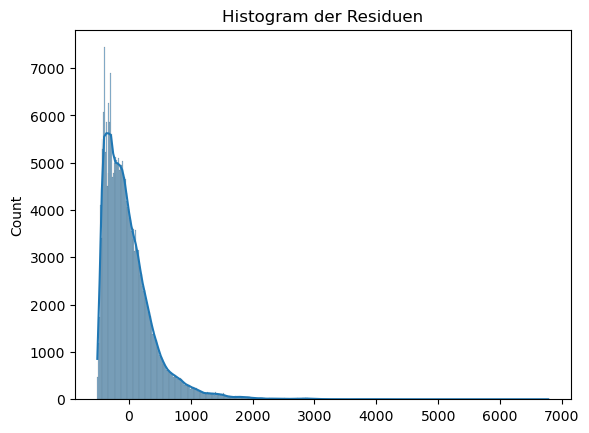

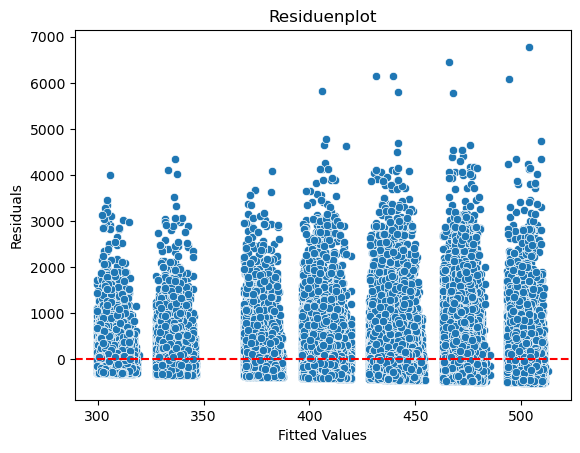

In [51]:
# Residuen berechnen
residuals = model2.resid

# Histogramm der Residuen
sns.histplot(residuals, kde=True)
plt.title('Histogram der Residuen')
plt.show()

# Residuenplot
sns.scatterplot(x=model2.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuenplot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Lineare Regression (Geschlecht, Alter, ÖV-Güteklasse, Haushaltseinkommen)

In [52]:
X3 = train[['ZP_ALTER', 'HH_HAUSHALTSEINKOMMEN_2', 'HH_HAUSHALTSEINKOMMEN_3', 'HH_HAUSHALTSEINKOMMEN_4', 'HH_HAUSHALTSEINKOMMEN_5', 'HH_HAUSHALTSEINKOMMEN_6', 'HH_HAUSHALTSEINKOMMEN_7',
                    'HH_HAUSHALTSEINKOMMEN_8', 'HH_HAUSHALTSEINKOMMEN_9', 'HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]
X3 = sm.add_constant(X3)
y3 = train['CO2E_TOTAL']

In [53]:
# Modell anpassen
model3 = sm.OLS(y3, X3).fit()

# Zusammenfassung des Modells anzeigen
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     324.3
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:20:09   Log-Likelihood:            -2.1353e+06
No. Observations:              286147   AIC:                         4.271e+06
Df Residuals:                  286133   BIC:                         4.271e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Bedeutung der Kategorien:

- 1	Unter CHF 2000
- 2	CHF 2000 bis 4000
- 3	CHF 4001 bis 6000
- 4	CHF 6001 bis 8000
- 5	CHF 8001 bis 10000
- 6	CHF 10001 bis 12000
- 7	CHF 12001 bis 14000
- 8	CHF 14001 bis 16000
- 9	Mehr als CHF 16000

### Interpretation
- Einkommensstufen (2 bis 9): Mit steigendem Einkommen wächst der CO₂-Ausstoß.

Beispiel:
- CHF 2000-4000 (+21.37 kg)
- CHF 4001-6000 (+57.78 kg)
- CHF 6001-8000 (+46.62 kg)
- Höchste Kategorie (>16000): +33.92 kg

Der signifikante Anstieg des CO₂-Ausstosses bei mittleren und hohen Einkommen könnte darauf hindeuten, dass wohlhabendere Haushalte häufiger CO₂-intensive Verkehrsmittel wie Autos oder Flugzeuge nutzen. Bei sehr hohem Einkommen nimmt der CO2-Ausstoss anschliessend ab.